#딥러닝으로 분류하기

#데이터셋 확인

In [84]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=';')

df.dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#결측치 확인

In [85]:
df['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


#데이터 나누기

In [86]:
#입력과 출력 나누기
X = df.drop(columns=['quality'])
Y = df['quality']

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [87]:
Y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


#X를 스케일링 하기


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#결측치를 0부터 인코딩하기

In [89]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# Y 데이터를 인코딩하여 Y_encoded 변수에 저장
Y_encoded = encoder.fit_transform(Y)

# 변환된 라벨을 Y에 할당하여 업데이트
Y = Y_encoded

# 업데이트된 Y의 상위 5개 값 확인
print("업데이트된 Y 데이터의 상위 5개:\n", Y[:5])

# 업데이트된 Y의 고유한 값과 개수 확인
print("\n업데이트된 Y의 고유한 값들:", pd.Series(Y).unique())
print("\n업데이트된 Y의 값별 개수:\n", pd.Series(Y).value_counts().sort_index())

업데이트된 Y 데이터의 상위 5개:
 [3 3 3 3 3]

업데이트된 Y의 고유한 값들: [3 2 4 5 1 0 6]

업데이트된 Y의 값별 개수:
 0      20
1     163
2    1457
3    2198
4     880
5     175
6       5
Name: count, dtype: int64


In [90]:
Y

array([3, 3, 3, ..., 3, 4, 3])

#one-hot encoding 하기


In [91]:
# one-hot encoding 하기
# Y_encoded는 LabelEncoder를 통해 1차원으로 변환된 데이터입니다.
Y = pd.get_dummies(Y_encoded).values

Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

#X를 NUMPY로 변경

In [93]:
X = X.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

#train과 Test로 나누기

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [73]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

#모델 학습

In [96]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2613 - loss: 14.2362 - val_accuracy: 0.4668 - val_loss: 2.3438
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3412 - loss: 2.9175 - val_accuracy: 0.4681 - val_loss: 1.6350
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3537 - loss: 1.9425 - val_accuracy: 0.4656 - val_loss: 1.3473
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3762 - loss: 1.5448 - val_accuracy: 0.4477 - val_loss: 1.3194
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4079 - loss: 1.4385 - val_accuracy: 0.4758 - val_loss: 1.2787
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4412 - loss: 1.3362 - val_accuracy: 0.4668 - val_loss: 1.2332
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4493 - loss: 1.3085 - val_accuracy: 0.4770 - val_loss: 1.2316
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4652 - loss: 1.2894 - val_accuracy: 0

#결과값

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


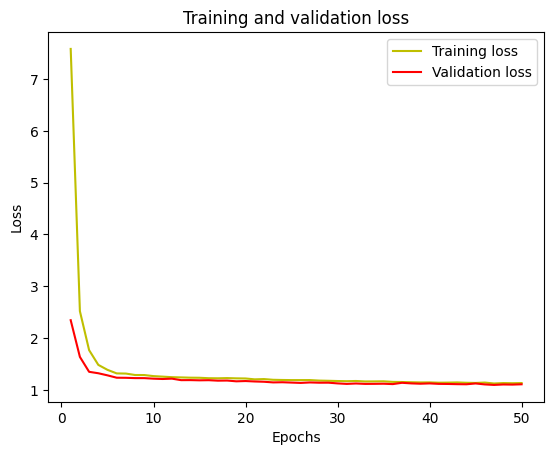

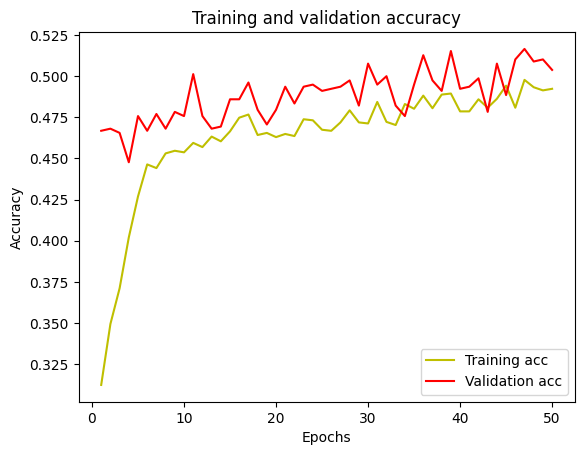

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        51
           2       0.44      0.42      0.43       295
           3       0.45      0.76      0.56       409
           4       0.50      0.02      0.04       183
           5       0.00      0.00      0.00        33

    accuracy                           0.45       980
   macro avg       0.23      0.20      0.17       980
weighted avg       0.41      0.45      0.37       980

[[  0   1   4   4   0   0]
 [  0   0  36  15   0   0]
 [  0   0 125 170   0   0]
 [  0   1  97 309   1   1]
 [  0   0  19 159   4   1]
 [  0   0   1  29   3   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
import numpy as np

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))